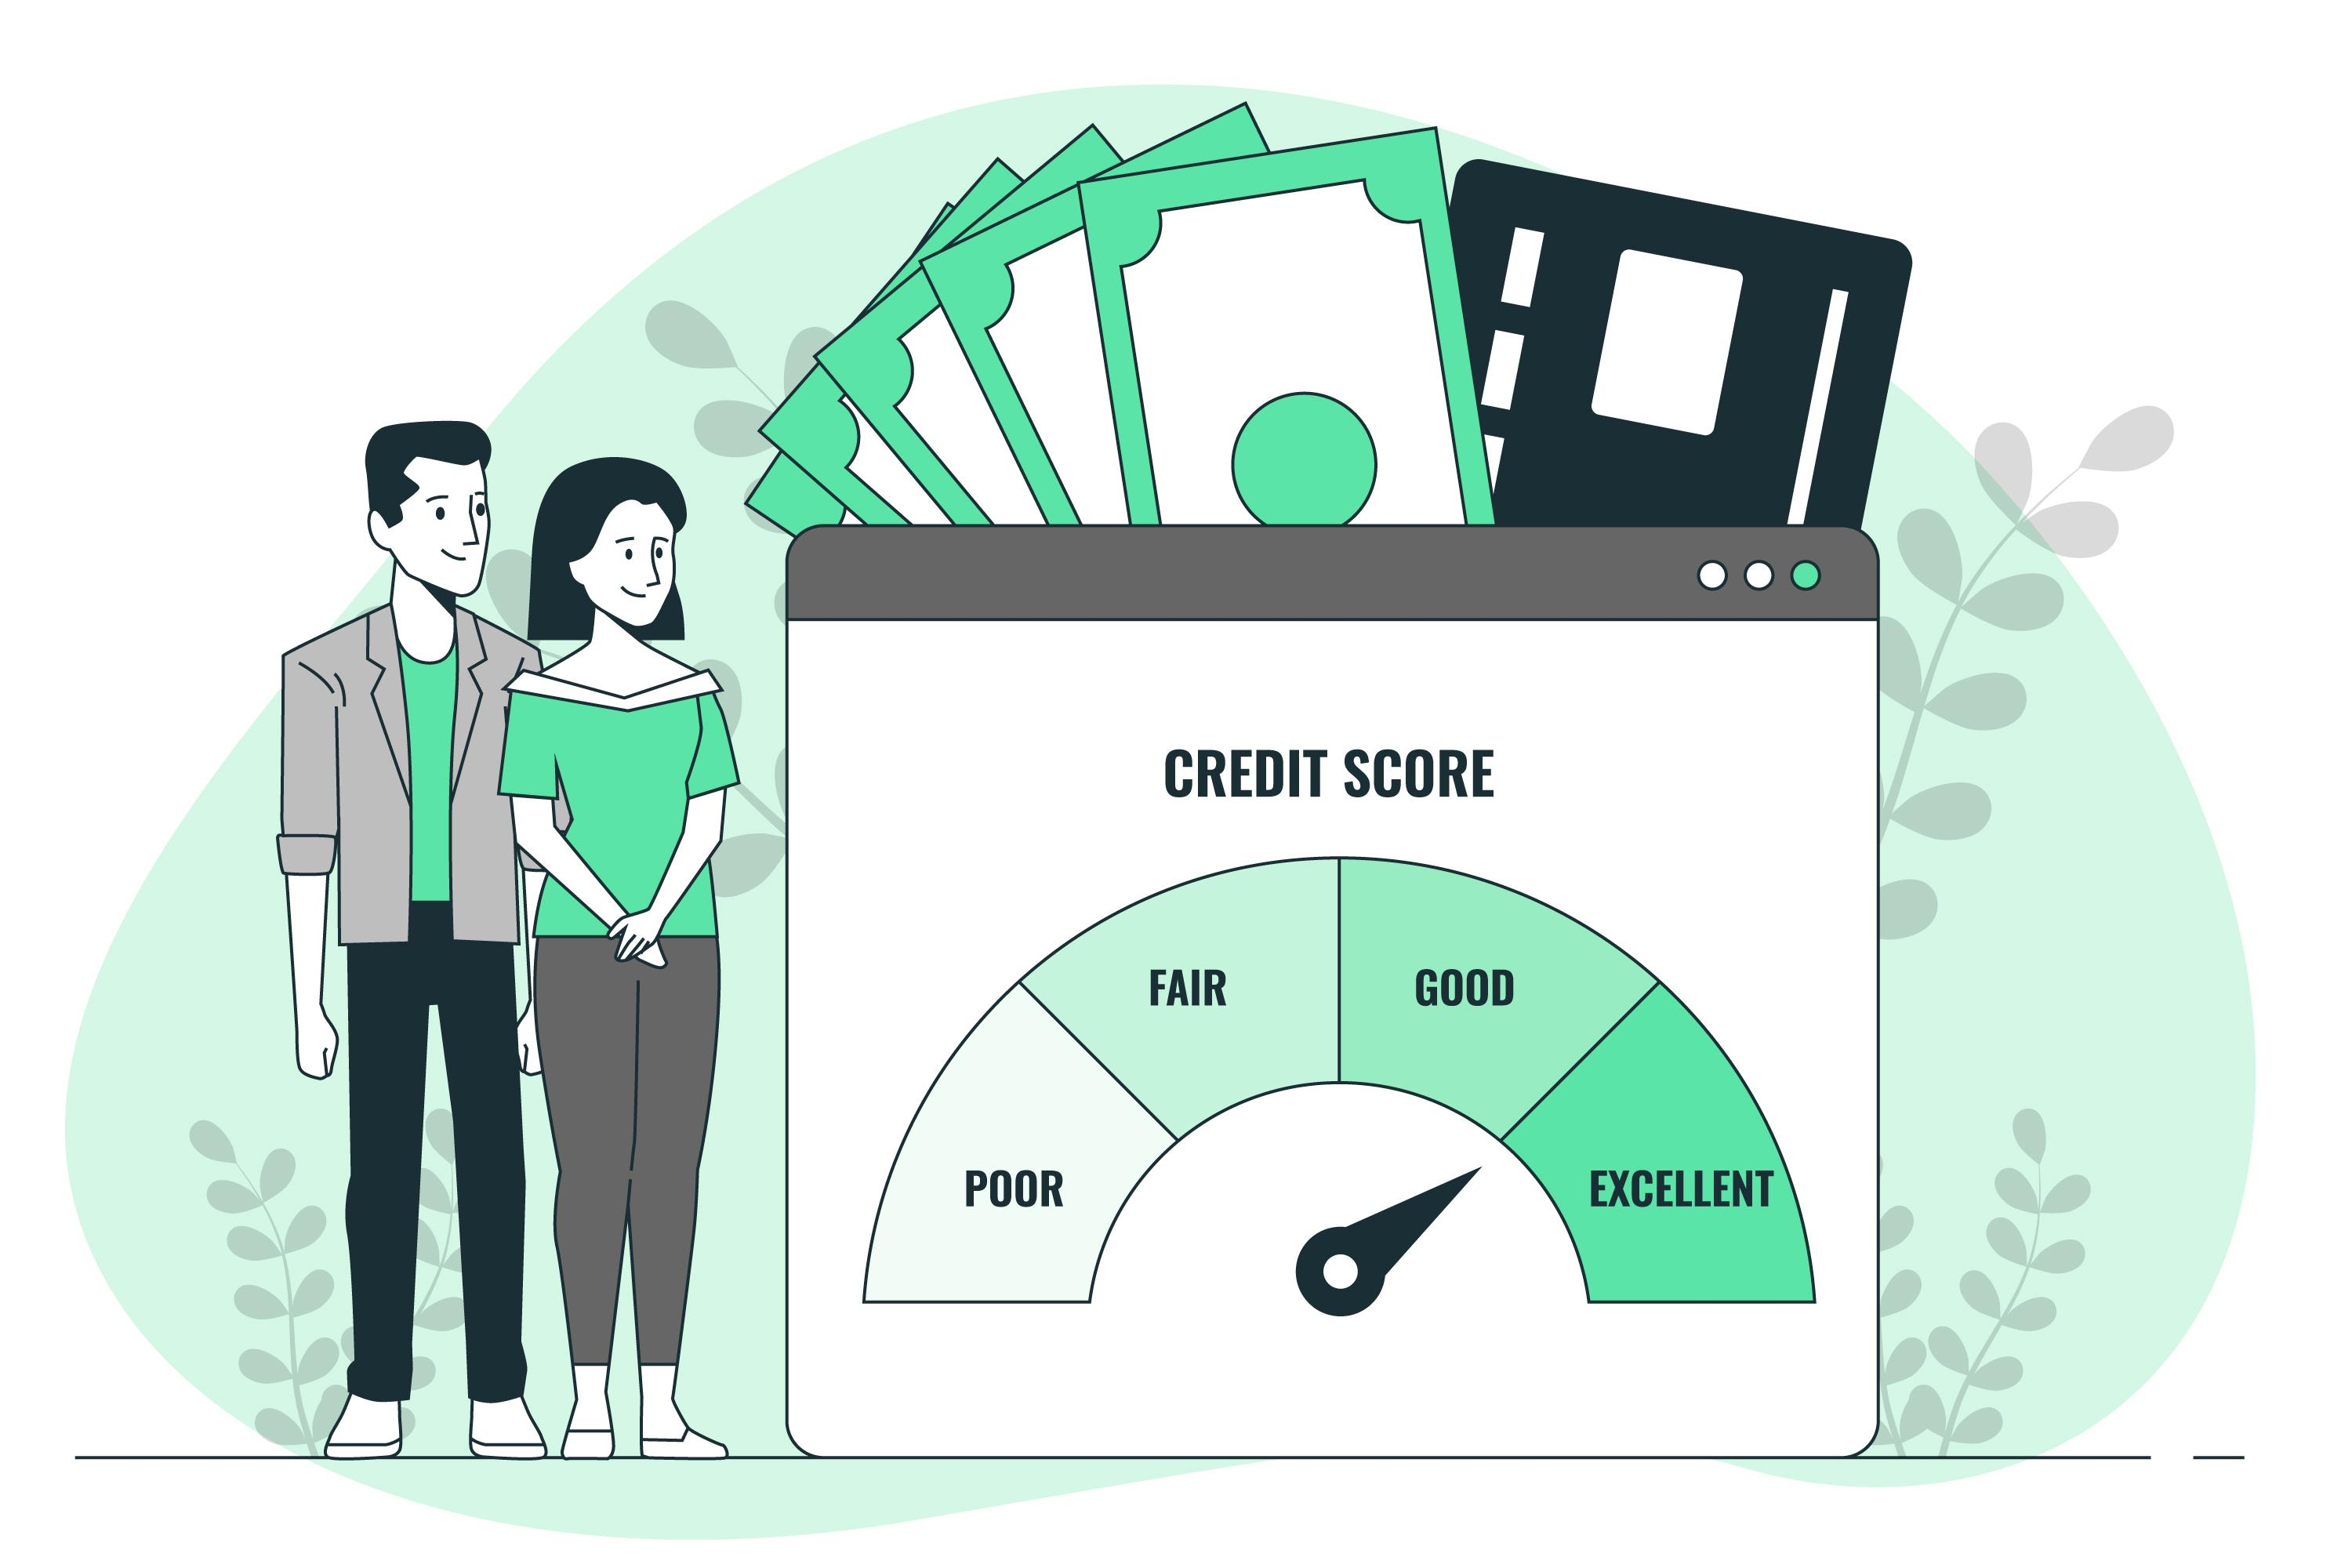

# Problem Statement:
Over the years, the company has collected basic bank details
and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people
into credit score brackets to reduce the manual efforts. Given a person’s credit-related information, build a machine learning
model that can classify the credit score.

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df = pd.read_csv("credit_score.csv")

In [3]:
#Check the head of the dataset
df.head().T

,0,1,2,3,4
ID,0x1602,0x1603,0x1604,0x1605,0x1606
Customer_ID,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40
Month,January,February,March,April,May
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh
Age,23,23,-500,23,23
SSN,821-00-0265,821-00-0265,821-00-0265,821-00-0265,821-00-0265
Occupation,Scientist,Scientist,Scientist,Scientist,Scientist
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12
Monthly_Inhand_Salary,1824.843333,NaN,NaN,NaN,1824.843333
Num_Bank_Accounts,3,3,3,3,3


In [4]:
#Removing unnecessary columns from the dataset
df = df.drop(columns=['ID', 'Customer_ID', 'Name', 'SSN', 'Type_of_Loan', 'Credit_History_Age'])

In [5]:
#Check the head of the dataset again
df.head().T

,0,1,2,3,4
Month,January,February,March,April,May
Age,23,23,-500,23,23
Occupation,Scientist,Scientist,Scientist,Scientist,Scientist
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12
Monthly_Inhand_Salary,1824.843333,NaN,NaN,NaN,1824.843333
Num_Bank_Accounts,3,3,3,3,3
Num_Credit_Card,4,4,4,4,4
Interest_Rate,3,3,3,3,3
Num_of_Loan,4,4,4,4,4
Delay_from_due_date,3,-1,3,5,6


In [6]:
#Check the shape of the dataset
df.shape

(100000, 22)

In [7]:
#Check the column types of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

In [8]:
#Check the statistical data
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [9]:
#Check the missing values in the dataset
df.isnull().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

Since the dataset has a lot of special characters we will replace the special characters with empty string or with null values
according to the data and convert it into int or float datatype. Also, we will convert the categorical values of some columns
into integer values.

In [10]:
df['Age'] = df['Age'].astype(str).str.replace('_','').astype(int)
df['Occupation'] = df['Occupation'].replace('_',np.nan)
df['Annual_Income'] = df['Annual_Income'].astype(str).str.replace('_','').astype(float)
df['Num_of_Loan'] = df['Num_of_Loan'].astype(str).str.replace('_','').astype(float)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(str).str.replace('_','').astype(float)
df['Credit_Score'] = df['Credit_Score'].replace(['Poor','Standard','Good'],[0, 1, 2])
df['Monthly_Balance'] = df['Monthly_Balance'].astype(str).str.replace('_','').astype(float)
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8', np.nan)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(str).str.replace('_','').astype(float)
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace('NM','No')
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace(['Yes','No'],[1, 0])
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(str).str.replace('_','').astype(float)
df['Credit_Mix'] =  df['Credit_Mix'].replace('_',np.nan)
df['Credit_Mix'] =  df['Credit_Mix'].replace(['Standard','Good','Bad'],[1, 2, 0])
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_',np.nan)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)

In [11]:
#Check the datatype of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int64  
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  float64
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                79805 non-null   fl

In [12]:
#Check the missing values
df.isnull().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [13]:
#Use forward and backward filling method to fill the missing values
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

In [14]:
#Check the missing values again
df.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [15]:
#Check the statistical data
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.00000
mean,110.649700,1.764157e+05,4196.144246,17.091280,22.47443,72.466040,3.009960,21.068780,30.768580,10.389784,27.699800,1.065240,1426.220376,32.285173,0.523260,1403.118217,636.932570,-3.000000e+22,0.88830
std,686.244717,1.429618e+06,3187.848468,117.404834,129.05741,466.422621,62.647879,14.860104,225.403321,6.790119,192.881417,0.733177,1155.129026,5.116875,0.499461,8306.041270,2041.827136,3.162151e+24,0.67512
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.000000,0.230000,20.000000,0.000000,0.000000,0.000000,-3.333333e+26,0.00000
25%,24.000000,1.945750e+04,1625.558333,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,5.330000,3.000000,1.000000,566.072500,28.052567,0.000000,30.306660,74.616863,2.700394e+02,0.00000
50%,33.000000,3.757861e+04,3089.544583,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1.000000,1166.155000,32.305784,1.000000,69.249473,135.959898,3.370244e+02,1.00000
75%,42.000000,7.279092e+04,5957.715000,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.860000,9.000000,2.000000,1945.962500,36.496663,1.000000,161.224249,266.118215,4.714038e+02,1.00000
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,2.000000,4998.070000,50.000000,1.000000,82331.000000,10000.000000,1.602041e+03,2.00000


In [64]:
df['Credit_Score'].value_counts()

1    53174
0    28998
2    17828
Name: Credit_Score, dtype: int64

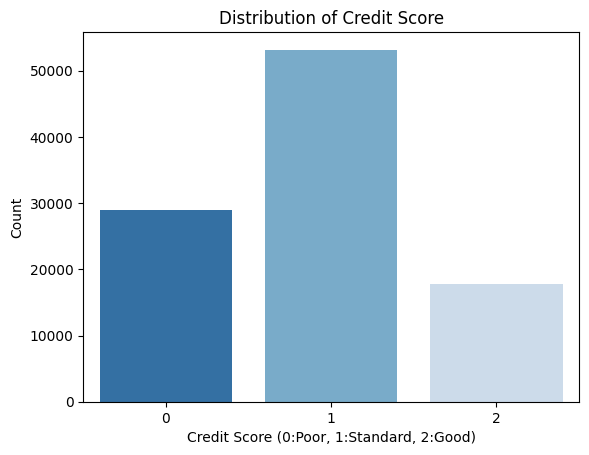

In [82]:
#Visualize the number of patients having a heart disease and not having a heart disease
sns.countplot(x = 'Credit_Score', data = df, palette = 'Blues_r')
plt.xlabel('Credit Score (0:Poor, 1:Standard, 2:Good)')
plt.ylabel('Count')
plt.title('Distribution of Credit Score')
plt.show()

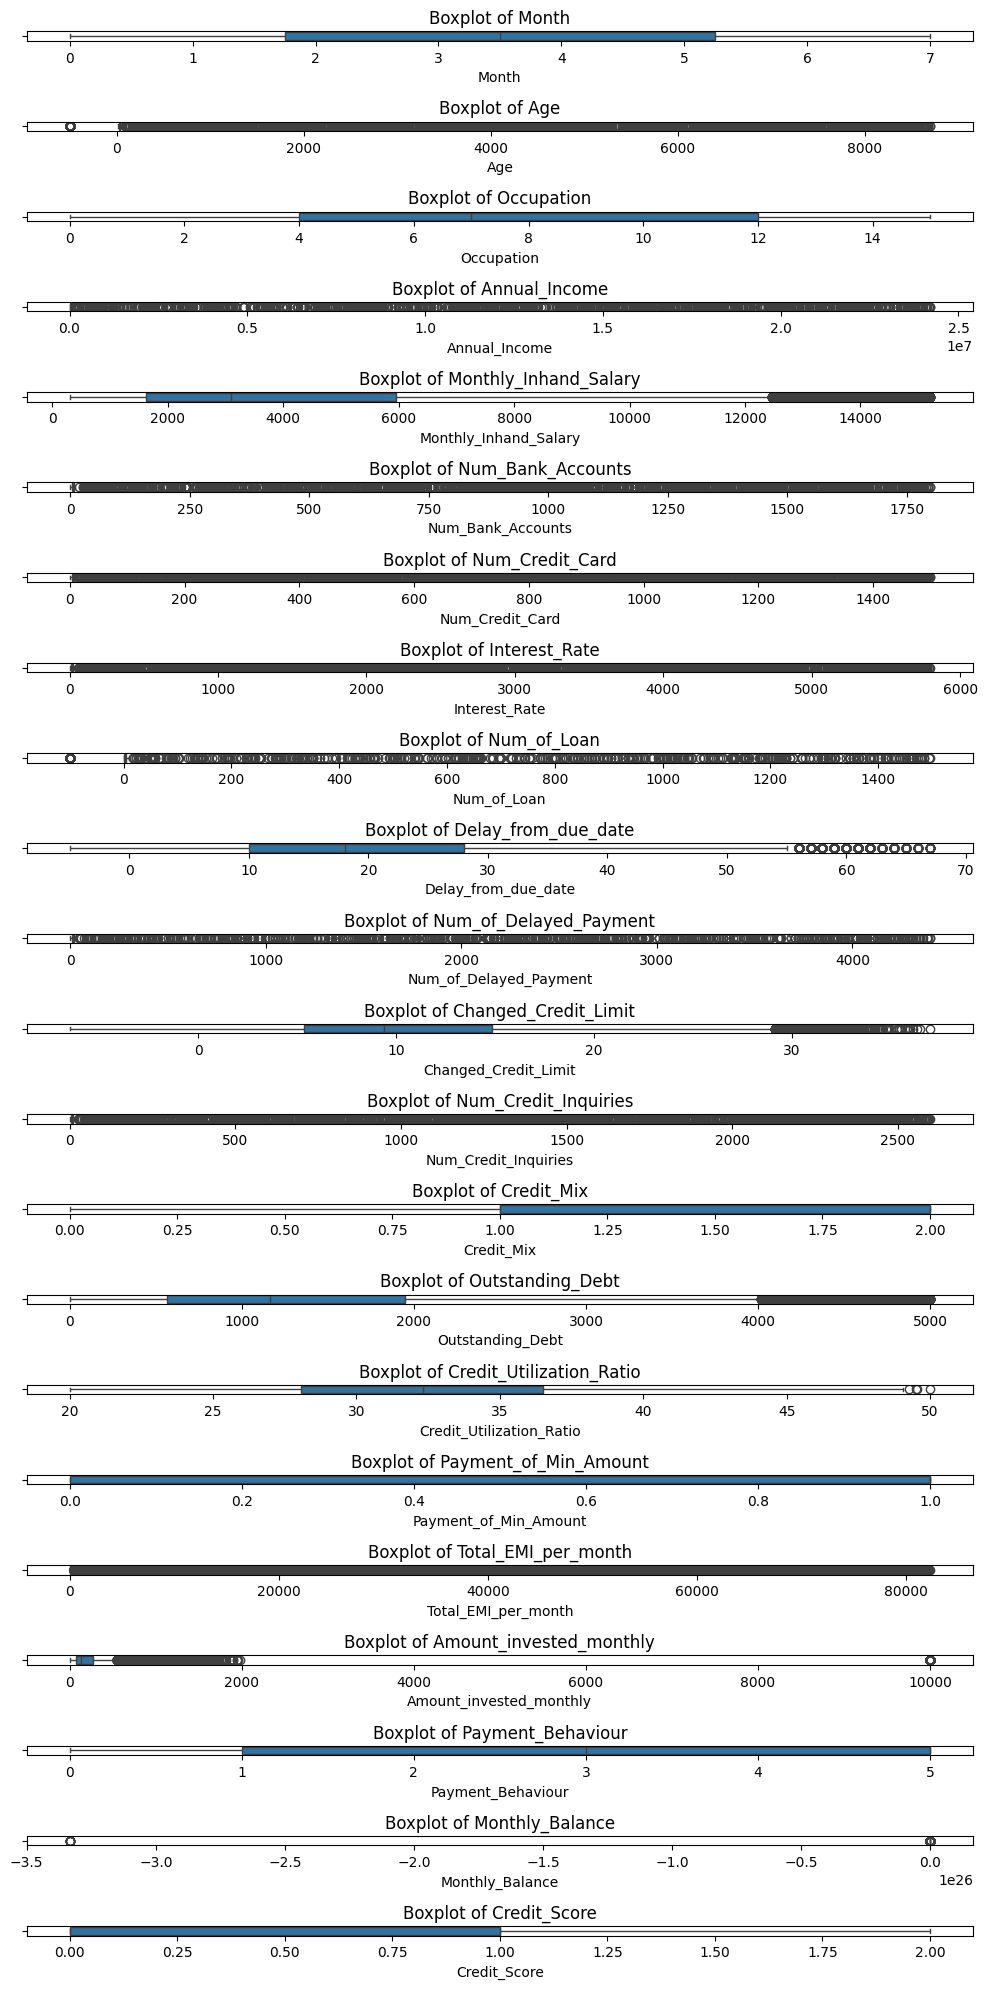

In [72]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(10, 20))

# Iterate over each feature and create a boxplot
for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

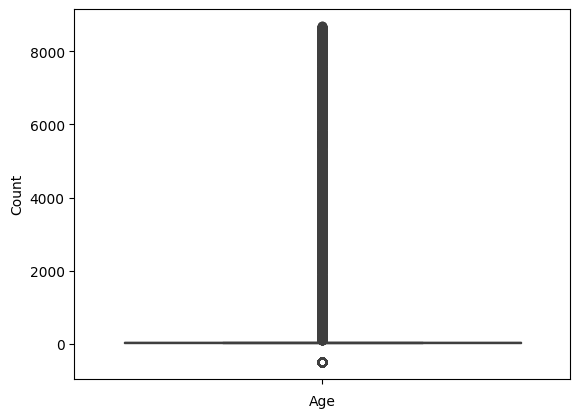

In [16]:
#Removing outliers from Age column since all other columns values are relevant
sns.boxplot(df['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

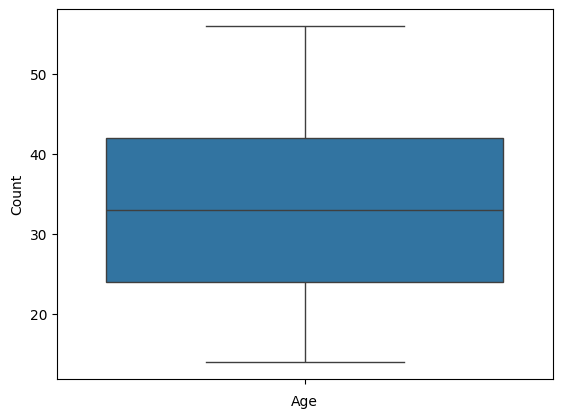

In [17]:
col_names = ['Age']
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3 - Q1
data = df[(df.Age >= Q1 - 1.5 * IQR) & (df.Age <= Q3 + 1.5 * IQR)]
sns.boxplot(data['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

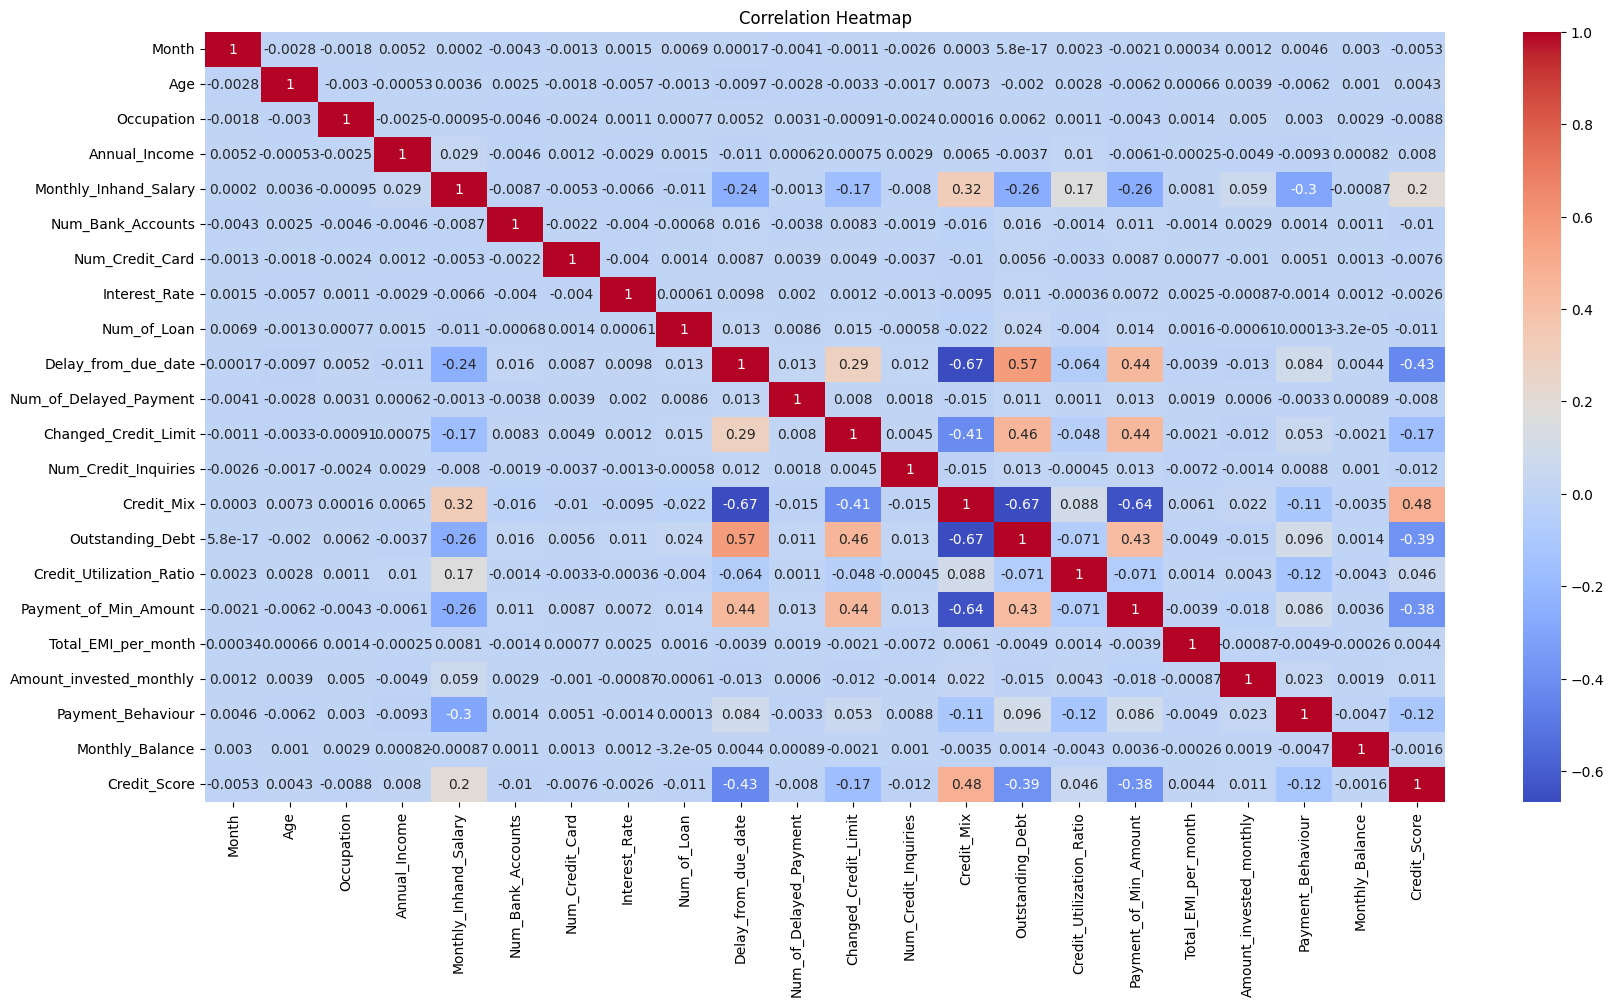

In [75]:
#Visualize the correlation among all fields
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')

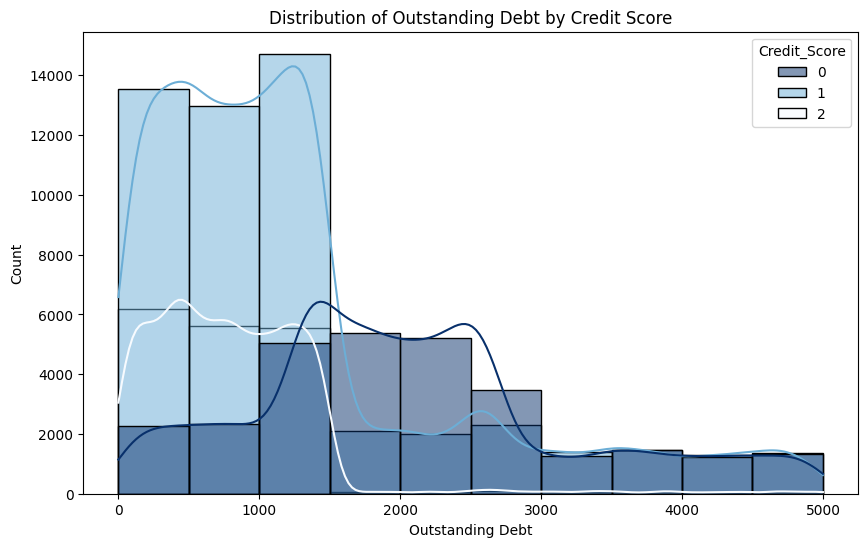

In [83]:
# Distribution of Outstanding debt by Credit Score
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Outstanding_Debt', bins=10, kde=True, hue='Credit_Score', palette='Blues_r')
plt.title('Distribution of Outstanding Debt by Credit Score')
plt.xlabel('Outstanding Debt')
plt.ylabel('Count')
plt.show()

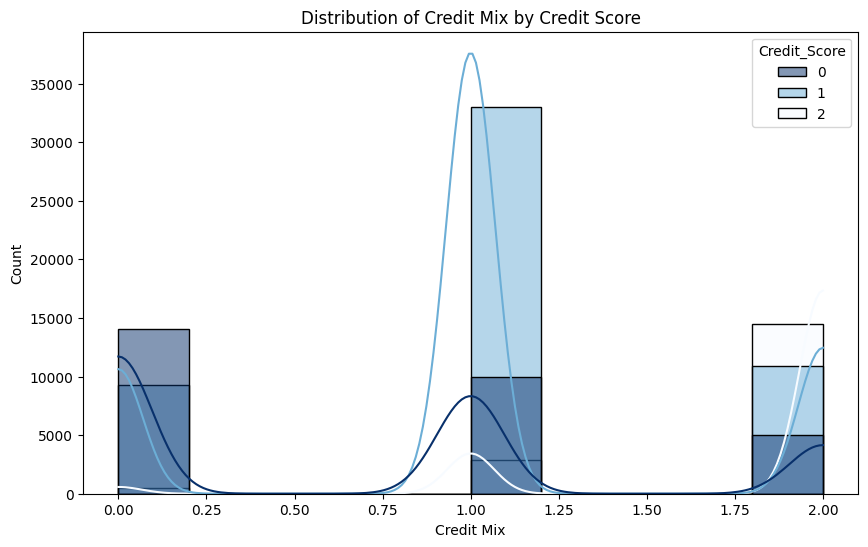

In [84]:
# Distribution of Credit Mix by Credit Score
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Credit_Mix', bins=10, kde=True, hue='Credit_Score', palette='Blues_r')
plt.title('Distribution of Credit Mix by Credit Score')
plt.xlabel('Credit Mix')
plt.ylabel('Count')
plt.show()

# Label Encoding for categorical features of the dataframe

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])

In [20]:
#Check the datatype of the columns to confirm label Encoding is a success
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  int64  
 2   Occupation                100000 non-null  int64  
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  float64
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  fl

# Feature Selection

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
col_list = []
for col in df.columns:
    if((df[col].dtype != 'object') & (col != 'Credit_Score')):
        col_list.append(col)

In [23]:
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                     feature       VIF
0                      Month  0.300012
1                        Age  0.974661
2                 Occupation  0.275594
3              Annual_Income  0.985001
4      Monthly_Inhand_Salary  0.365970
5          Num_Bank_Accounts  0.979247
6            Num_Credit_Card  0.970567
7              Interest_Rate  0.976430
8                Num_of_Loan  0.997697
9        Delay_from_due_date  0.332213
10    Num_of_Delayed_Payment  0.981707
11      Changed_Credit_Limit  0.299307
12      Num_Credit_Inquiries  0.979793
13                Credit_Mix  0.321474
14          Outstanding_Debt  0.396141
15  Credit_Utilization_Ratio  0.024506
16     Payment_of_Min_Amount  0.476749
17       Total_EMI_per_month  0.972258
18   Amount_invested_monthly  0.911321
19         Payment_Behaviour  0.310525
20           Monthly_Balance  1.000208


Since all the features have VIF value less than 5, we will select all the features

In [24]:
#Independent variables
X = df.drop(columns=['Credit_Score'])

#Dependent variable
y = df['Credit_Score']

# Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
#Split the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()

In [31]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

In [32]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(lr, param_grid, cv=5)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [33]:
#Get the best parameters
best_params = grid_search.best_params_

In [34]:
#Print the best parameters
best_params

{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}

In [35]:
best_model = LogisticRegression(**best_params)

In [36]:
best_model.fit(X_train, y_train)

LogisticRegression(C=0.01, penalty='l1', solver='saga')

In [37]:
y_pred = best_model.predict(X_test)

# Model Evaluation

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test, y_pred)

0.6185

In [40]:
pd.DataFrame({'Actual_value':y_test, 'Predicted_value':y_pred})

,Actual_value,Predicted_value
75721,2,2
80184,0,0
19864,2,2
76699,0,0
92991,2,2
...,...,...
32595,1,1
29313,1,1
37862,0,1
53421,1,1


# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dt = DecisionTreeClassifier()

In [44]:
#Hyperparameter tuning
param_grid_dt = {
    'max_features': ['log2','sqrt','auto'],
    'criterion': ['entropy','gini'],
    'max_depth': [2, 3, 5, 10, 50],
    'min_samples_split': [2, 3, 50, 100],
    'min_samples_leaf': [1, 5, 8, 10]
}

In [45]:
#Train the model and predict on the test set
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5)
grid_search_dt = grid_search_dt.fit(X_train, y_train)

In [47]:
#Get the best parameters
best_params_dt = grid_search_dt.best_params_

In [48]:
#Print the best parameters
best_params_dt

{'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 50}

In [50]:
best_model_dt = DecisionTreeClassifier(**best_params_dt)

In [51]:
best_model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=50, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=50)

In [52]:
y_pred_dt = best_model_dt.predict(X_test)

In [53]:
#Model Evaluation
acc_dt = round(accuracy_score(y_test, y_pred_dt) * 100, 2)
print('Accuracy of Decision Tree Model : ',acc_dt)

Accuracy of Decision Tree Model :  71.16


In [54]:
pd.DataFrame({'Actual_value': y_test,'Predicted_value': y_pred_dt})

,Actual_value,Predicted_value
75721,2,2
80184,0,1
19864,2,1
76699,0,0
92991,2,2
...,...,...
32595,1,1
29313,1,1
37862,0,1
53421,1,1


In [60]:
#Accessing the best estimator
best_dt_estimator = grid_search_dt.best_estimator_

In [61]:
# Creating a DataFrame to store feature importances
feature_importance_dt = pd.DataFrame({'Feature': X.columns, 'Importance': best_dt_estimator.feature_importances_})

In [62]:
# Sorting the DataFrame by feature importance in descending order
feature_importance_dt = feature_importance_dt.sort_values(by='Importance', ascending=False)

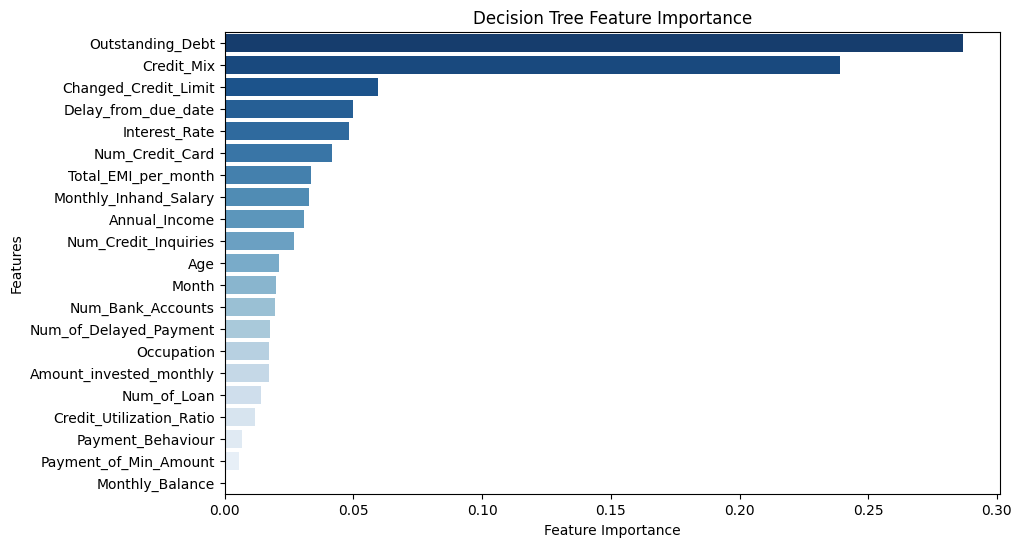

In [63]:
# Plotting feature importance using seaborn with a specified palette
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_dt, x='Importance', y='Feature', palette="Blues_r")
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Decision Tree Feature Importance')
plt.show()

Based on the feature importance chart provided, we can infer that certain factors are more influential in determining a customer's credit score when using this particular decision tree model.

Here are some insights:
**Outstanding_Debt**: This is the most significant feature, suggesting that the amount of debt a customer currently has is a critical factor in their credit score. A higher outstanding debt is likely to negatively impact the credit score and also suggests higher risk.
**Credit_Mix**: The second most important feature indicates that having a diverse mix of credit types (e.g., credit cards, personal loans, mortgages) is important for a healthy credit score.
**Changed_Credit_Limit**: Changes in credit limits, whether increases or decreases, are also a key factor. This could reflect responsible credit management and trust from creditors if limits are increased, potentially improving the credit score.
**Delay_from_due_date and Interest_Rate**: These moderately important features suggest that payment timeliness and the cost of borrowing are also considered in the credit score. Late payments and higher interest rates might be indicative of higher risk, thus lowering the credit score.
**Less Influential Features**: Features like Monthly_Balance, Payment_of_Min_Amount, Payment_Behaviour, Credit_Utilization_Ratio, and Num_of_Loan have very low importance scores, indicating they have a minimal direct impact on the credit score in this model.

It's important to note that while this chart provides insights into the relative importance of different features within this specific decision tree model, the actual credit score of a customer would be determined by the specific values of these features and how they interact within the model's structure. Additionally, different models may weigh these factors differently, and the credit scoring process can be complex, involving additional considerations beyond what is shown in this chart.
